In [0]:
! pip install soykeyword
! pip install soyclustering
! pip install soynlp # 파이썬에서 한글관련 테스트처리 패키지
! pip install konlpy  # 한글형태소 분석기
! pip install pyLDAvis # 토픽 모델링 시각화
! bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh) # 한글 형태소 분석기
# 오래걸림

In [0]:
random_seed = 2020

In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('/content/everytime_개강2.csv')

In [0]:
df.tail()

,Unnamed: 0,date,title,body,comments
2252,2252,01/18 02:50,브로리에게 물어봐,브로리님!\n\n추가학기를 하지않는다면 학점포기할 수 있는 마지막 기간은 결국 8학...,"['네', '감사합니다!']"
2253,2253,01/18 00:55,자과캠 자유게시판,타의대 친구중 하나는 담주 개강하던데,"['개빡세넹;', '학년마다 다름']"
2254,2254,01/16 21:33,인사캠 자유게시판,개강하고 이런몸 보면 난줄알아라,"['ㅈㄴ싫다', '직.접.말.해', '존.나.싫.다', 'ㅋㅋㅋㅋㅋㅋㅋ와 진짜 망상..."
2255,2255,01/16 16:39,인사캠 자유게시판,몇월에 개강하나요?,['학교마다 달라요 수학보고서에 나와있으니 참고하시면 좋을거같아요']
2256,2256,01/16 10:13,자과캠 자유게시판,형누나들 도와주세요ㅠㅠ\n지금 국제품만 남고 이미 일다니고 있는 영어쓰레기입니다\n...,"['제발 오픽하세요', '왜오픽추천하시나요ㅠㅠ 기회가한번뿐일것같아서 오픽하면..',..."


In [0]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.tail()

,date,title,body,comments
2252,01/18 02:50,브로리에게 물어봐,브로리님!\n\n추가학기를 하지않는다면 학점포기할 수 있는 마지막 기간은 결국 8학...,"['네', '감사합니다!']"
2253,01/18 00:55,자과캠 자유게시판,타의대 친구중 하나는 담주 개강하던데,"['개빡세넹;', '학년마다 다름']"
2254,01/16 21:33,인사캠 자유게시판,개강하고 이런몸 보면 난줄알아라,"['ㅈㄴ싫다', '직.접.말.해', '존.나.싫.다', 'ㅋㅋㅋㅋㅋㅋㅋ와 진짜 망상..."
2255,01/16 16:39,인사캠 자유게시판,몇월에 개강하나요?,['학교마다 달라요 수학보고서에 나와있으니 참고하시면 좋을거같아요']
2256,01/16 10:13,자과캠 자유게시판,형누나들 도와주세요ㅠㅠ\n지금 국제품만 남고 이미 일다니고 있는 영어쓰레기입니다\n...,"['제발 오픽하세요', '왜오픽추천하시나요ㅠㅠ 기회가한번뿐일것같아서 오픽하면..',..."


In [0]:
condition = (df['title'] != '홍보게시판')
len(df[condition])

2114

In [0]:
df = df[condition]
df

,date,title,body,comments
0,06/06 00:40,브로리에게 물어봐,브로리님 계절학기 녹화강의인지 실시간인지는 개강해야 알 수 있나요?,[]
1,06/05 23:46,자과캠 자유게시판,맨날 10시간씩은 공부하는거 같은데(강의듣는시간 주말포함)\n\n왜 이렇게 모르는게...,"['......ㄷㄷ', '고시준비함?', '나도임..몇학년 몇과목이야?', '3학년..."
2,06/05 20:28,인사캠 자유게시판,새내기인데 그냥 개강 안해도 서울 올라가서 토익학원이나 다녀보려하는데\n\n보통 어...,[]
3,06/05 09:42,인사캠 자유게시판,2학기 개강은 보통 언제 하나요?,"['8월말 - 9월이용', '감사합니다~']"
5,06/04 16:23,인사캠 자유게시판,7월첫주인가요?,"['6월달 아닌가요', '학사일정ㄱㄱ', '6월22일인데']"
...,...,...,...,...
2252,01/18 02:50,브로리에게 물어봐,브로리님!\n\n추가학기를 하지않는다면 학점포기할 수 있는 마지막 기간은 결국 8학...,"['네', '감사합니다!']"
2253,01/18 00:55,자과캠 자유게시판,타의대 친구중 하나는 담주 개강하던데,"['개빡세넹;', '학년마다 다름']"
2254,01/16 21:33,인사캠 자유게시판,개강하고 이런몸 보면 난줄알아라,"['ㅈㄴ싫다', '직.접.말.해', '존.나.싫.다', 'ㅋㅋㅋㅋㅋㅋㅋ와 진짜 망상..."
2255,01/16 16:39,인사캠 자유게시판,몇월에 개강하나요?,['학교마다 달라요 수학보고서에 나와있으니 참고하시면 좋을거같아요']


In [0]:
def get_month(x):
  return int(x[:2])

In [0]:
def get_day(x):
  return int(x[3:5])

In [0]:
df_without_comments= df.drop('comments', axis=1)
df_without_comments['month'] = df_without_comments['date'].apply(get_month)
df_without_comments['day'] = df_without_comments['date'].apply(get_day)
df_without_comments

,date,title,body,month,day
0,06/06 00:40,브로리에게 물어봐,브로리님 계절학기 녹화강의인지 실시간인지는 개강해야 알 수 있나요?,6,6
1,06/05 23:46,자과캠 자유게시판,맨날 10시간씩은 공부하는거 같은데(강의듣는시간 주말포함)\n\n왜 이렇게 모르는게...,6,5
2,06/05 20:28,인사캠 자유게시판,새내기인데 그냥 개강 안해도 서울 올라가서 토익학원이나 다녀보려하는데\n\n보통 어...,6,5
3,06/05 09:42,인사캠 자유게시판,2학기 개강은 보통 언제 하나요?,6,5
5,06/04 16:23,인사캠 자유게시판,7월첫주인가요?,6,4
...,...,...,...,...,...
2252,01/18 02:50,브로리에게 물어봐,브로리님!\n\n추가학기를 하지않는다면 학점포기할 수 있는 마지막 기간은 결국 8학...,1,18
2253,01/18 00:55,자과캠 자유게시판,타의대 친구중 하나는 담주 개강하던데,1,18
2254,01/16 21:33,인사캠 자유게시판,개강하고 이런몸 보면 난줄알아라,1,16
2255,01/16 16:39,인사캠 자유게시판,몇월에 개강하나요?,1,16


In [0]:
# from konlpy.tag import Okt
# # 띄어쓰기도 감안함
# okt = Okt()
# s = df_without_comments.iloc[0]['body']
# print(okt.morphs(s, norm=True, stem=True))
# okt.nouns()

In [0]:
from soynlp.normalizer import *
from konlpy.tag import Okt
okt = Okt()

def text_preprocessing(text):
  text = only_hangle_number(text)
  text = emoticon_normalize(text, num_repeats=2)
  text = okt.nouns(text)
  text = np.array(text)
  return text

In [0]:
df_without_comments['clean_body'] = df_without_comments['body'].apply(text_preprocessing)
df_without_comments

,date,title,body,month,day,clean_body
0,06/06 00:40,브로리에게 물어봐,브로리님 계절학기 녹화강의인지 실시간인지는 개강해야 알 수 있나요?,6,6,"[브로, 리, 계절, 학기, 녹화, 강의, 실시간, 개강, 알, 수]"
1,06/05 23:46,자과캠 자유게시판,맨날 10시간씩은 공부하는거 같은데(강의듣는시간 주말포함)\n\n왜 이렇게 모르는게...,6,5,"[공부, 강의, 시간, 주말, 포함, 왜, 정도, 뇌, 문제, 고시생, 진짜]"
2,06/05 20:28,인사캠 자유게시판,새내기인데 그냥 개강 안해도 서울 올라가서 토익학원이나 다녀보려하는데\n\n보통 어...,6,5,"[새내기, 그냥, 개강, 안해, 서울, 토익, 학원, 보통, 어디, 가격, 얼마, 정도]"
3,06/05 09:42,인사캠 자유게시판,2학기 개강은 보통 언제 하나요?,6,5,"[학기, 개강, 보통, 언제, 하나요]"
5,06/04 16:23,인사캠 자유게시판,7월첫주인가요?,6,4,[]
...,...,...,...,...,...,...
2252,01/18 02:50,브로리에게 물어봐,브로리님!\n\n추가학기를 하지않는다면 학점포기할 수 있는 마지막 기간은 결국 8학...,1,18,"[브로, 리, 추가, 학기, 학점, 포기, 수, 마지막, 기간, 학기, 개강, 때,..."
2253,01/18 00:55,자과캠 자유게시판,타의대 친구중 하나는 담주 개강하던데,1,18,"[타의, 친구, 하나, 개강]"
2254,01/16 21:33,인사캠 자유게시판,개강하고 이런몸 보면 난줄알아라,1,16,"[개강, 몸]"
2255,01/16 16:39,인사캠 자유게시판,몇월에 개강하나요?,1,16,"[월, 개강, 하나요]"


In [0]:
import pickle

pickle.dump(df_without_comments, open('df_without_comments.p', 'wb'))

In [0]:
huhu = pickle.load(open('df_without_comments.p', 'rb'))
huhu

,date,title,body,month,day,clean_body
0,06/06 00:40,브로리에게 물어봐,브로리님 계절학기 녹화강의인지 실시간인지는 개강해야 알 수 있나요?,6,6,"[브로, 리, 계절, 학기, 녹화, 강의, 실시간, 개강, 알, 수]"
1,06/05 23:46,자과캠 자유게시판,맨날 10시간씩은 공부하는거 같은데(강의듣는시간 주말포함)\n\n왜 이렇게 모르는게...,6,5,"[공부, 강의, 시간, 주말, 포함, 왜, 정도, 뇌, 문제, 고시생, 진짜]"
2,06/05 20:28,인사캠 자유게시판,새내기인데 그냥 개강 안해도 서울 올라가서 토익학원이나 다녀보려하는데\n\n보통 어...,6,5,"[새내기, 그냥, 개강, 안해, 서울, 토익, 학원, 보통, 어디, 가격, 얼마, 정도]"
3,06/05 09:42,인사캠 자유게시판,2학기 개강은 보통 언제 하나요?,6,5,"[학기, 개강, 보통, 언제, 하나요]"
5,06/04 16:23,인사캠 자유게시판,7월첫주인가요?,6,4,[]
...,...,...,...,...,...,...
2252,01/18 02:50,브로리에게 물어봐,브로리님!\n\n추가학기를 하지않는다면 학점포기할 수 있는 마지막 기간은 결국 8학...,1,18,"[브로, 리, 추가, 학기, 학점, 포기, 수, 마지막, 기간, 학기, 개강, 때,..."
2253,01/18 00:55,자과캠 자유게시판,타의대 친구중 하나는 담주 개강하던데,1,18,"[타의, 친구, 하나, 개강]"
2254,01/16 21:33,인사캠 자유게시판,개강하고 이런몸 보면 난줄알아라,1,16,"[개강, 몸]"
2255,01/16 16:39,인사캠 자유게시판,몇월에 개강하나요?,1,16,"[월, 개강, 하나요]"


In [0]:
x1 = pd.DataFrame(huhu['title'].value_counts())
x1

,title
새내기게시판,746
인사캠 자유게시판,668
자과캠 자유게시판,306
동아리·학회,154
회계사준비성대생모임,32
브로리에게 물어봐,18
자과캠 장터게시판,15
인사캠 장터게시판,15
성대방송국,14
💚 성균관대 시즈니 게시판 💚,14


In [0]:
import matplotlib.font_manager as fm
from matplotlib import rc, style
# 현재 폴더 위치 = ./
fontpath = '/content/drive/My Drive/Data Mining/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
rc('font', family=font_name)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


46


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_

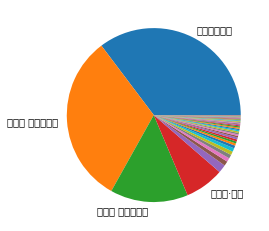

In [0]:
import matplotlib.pyplot as plt

idx = x1.index
print(len(idx))
idx_list = []
for i in range(len(idx)):
  if i < 4:
    idx_list.append(idx[i])
  else:
    idx_list.append('')
values = x1['title'].values
plt.pie(values, labels=idx_list)
plt.show()

In [0]:
condition = ((huhu['title'] =='새내기게시판') | (huhu['title'] == '인사캠 자유게시판') | (huhu['title'] == '자과캠 자유게시판'))

# condition = (df['title'] != '홍보게시판')
only_3_df = huhu[condition]

In [0]:
only_3_df.tail(3)

,date,title,body,month,day,clean_body
2254,01/16 21:33,인사캠 자유게시판,개강하고 이런몸 보면 난줄알아라,1,16,"[개강, 몸]"
2255,01/16 16:39,인사캠 자유게시판,몇월에 개강하나요?,1,16,"[월, 개강, 하나요]"
2256,01/16 10:13,자과캠 자유게시판,형누나들 도와주세요ㅠㅠ\n지금 국제품만 남고 이미 일다니고 있는 영어쓰레기입니다\n...,1,16,"[형, 누나, 지금, 국, 제품, 남고, 일다, 고, 영어, 쓰레기, 토익, 휴가,..."


In [0]:
condition1 = (((only_3_df['month'] == 1) & (only_3_df['day'] > 20)) | ((only_3_df['month'] == 2) & (only_3_df['day'] < 19)))
part_1 = only_3_df[condition1]
part_1

,date,title,body,month,day,clean_body
1655,02/18 22:18,인사캠 자유게시판,에 다 같이 모여서 뭐 하는 거 있을까요 ??\n엘씨끼리라던가,2,18,"[모, 뭐, 거, 엘, 끼리]"
1656,02/18 19:22,인사캠 자유게시판,그동안 뭔가 신나고 재밌는 일들만 소개해드린 것 같아 이번엔 그 반대편을 알려드리려...,2,18,"[그동안, 뭔가, 일, 소개, 것, 이번, 그, 반대편, 이제, 일몰, 생기, 기도..."
1659,02/18 16:58,인사캠 자유게시판,학교근처에 샤오롱바오 파는 곳 있나요??,2,18,"[학교, 근처, 샤오롱바오, 곳]"
1662,02/18 14:09,인사캠 자유게시판,"명륜이구요, 현재 3명 스터디중입니다!\n\n매번 풀어올 영역 정해서 풀고 온 뒤 ...",2,18,"[명륜, 이구, 현재, 명, 스터디, 매번, 영역, 정해, 풀, 온, 뒤, 형식, ..."
1663,02/18 11:28,인사캠 자유게시판,오프라인 개강하면 하는건가 이번에??,2,18,"[오프라인, 개강, 건가, 이번]"
...,...,...,...,...,...,...
2228,01/26 18:18,인사캠 자유게시판,우리학교 중국학생들 많은데 우한폐렴 안전하겠지...? 개강할때되면 안전하겠지...?,1,26,"[우리, 학교, 중국, 학생, 우한, 폐렴, 개강, 때]"
2235,01/26 00:22,인사캠 자유게시판,어린이 마스크 뭐 사는게 좋을까요? 어린 동생이 곧 있으면 개강하는데 마스크 사줘야...,1,26,"[어린이, 마스크, 뭐, 동생, 곧, 개강, 마스크, 것, 추천, 제일]"
2236,01/25 05:06,인사캠 자유게시판,뭘 해도 멘탈 회복이 아예 안됨 시발 거의 한달 가까이 밤에 잠도 안오고 밥도 안넘...,1,25,"[뭘, 해도, 멘탈, 회복, 아예, 시발, 거의, 달, 가까이, 밤, 잠도, 밥, ..."
2238,01/24 11:40,인사캠 자유게시판,개강하면 중국인밭일텐데 우리학교 단체로 우한폐렴행 아니냐,1,24,"[개강, 중국인, 밭, 우리, 학교, 단체, 우한, 폐렴, 행]"


In [0]:
condition2 = (((only_3_df['month'] == 2) & (only_3_df['day'] > 18)) | ((only_3_df['month'] == 3) & (only_3_df['day'] < 17)))
part2 = only_3_df[condition2]
part2

,date,title,body,month,day,clean_body
648,03/16 22:26,자과캠 자유게시판,집\n-내가 공부할리가없음\n\n도서관\n-문닫음\n\n독서실\n-곧 개강하니 한달...,3,16,"[집, 내, 공부, 할리, 도서관, 문, 독서실, 곧, 개강, 달치, 낭비, 일일,..."
650,03/16 21:23,인사캠 자유게시판,교재 복사실에서 사라는데 개강하고 사라는건지... 혹시 가보신분 있으면 꼭 알려주세요ㅜㅜ,3,16,"[교재, 복, 사실, 개강, 사라, 혹시, 가보, 신분, 꼭]"
651,03/16 21:08,새내기게시판,안되겠다 오프라인 개강하고 한달 안에 밥먹을 친구 못사귀면 반수다!,3,16,"[오프라인, 개강, 달, 안, 밥, 친구, 반수]"
652,03/16 21:06,새내기게시판,나빼고 다 개강하고 밥먹을 사람있는듯 ㅎㅋ.. 큰일,3,16,"[나, 개강, 밥, 사람, 큰일]"
656,03/16 19:51,인사캠 자유게시판,교자 복사실에서 받아가라는건 대체 무슨 소리얌..?\n오프개강하고 다시 공지해주시겠지?,3,16,"[교자, 복, 사실, 건, 대체, 무슨, 소리, 얌, 오프, 개강, 다시, 공지]"
...,...,...,...,...,...,...
1649,02/19 10:11,인사캠 자유게시판,9학점인채로 강의 주우려고하는데 그러면 등록금은 어떻게됨..?,2,19,"[학점, 채, 강의, 우려, 등록금]"
1650,02/19 10:03,인사캠 자유게시판,몇퍼?,2,19,[몇퍼]
1651,02/19 03:52,인사캠 자유게시판,걍 삭제하고 신청하면 되는거야??그럼 출석은 어케되는거지..?,2,19,"[삭제, 신청, 출석, 어케]"
1652,02/19 01:04,새내기게시판,개강첫날 새내기들은 확 티가 나겠져 ..? 비둘기마냥 두리번두리번거리는 사람은 무조...,2,19,"[개강, 첫날, 새내기, 확, 티, 비둘기, 마냥, 두리, 번, 사람, 무조건, 새내기]"


In [0]:
condition3 = (((only_3_df['month'] == 4) & (only_3_df['day'] < 6)) | ((only_3_df['month'] == 3) & (only_3_df['day'] >= 17)))
part3 = only_3_df[condition3]
part3

,date,title,body,month,day,clean_body
253,04/05 21:59,인사캠 자유게시판,ㅇㅈ?,4,5,[]
254,04/05 12:49,인사캠 자유게시판,아캠으로 계속 수업하나요? 당장 내일이 오프라인 개강인데,4,5,"[캠, 계속, 수업, 하나요, 당장, 내일, 오프라인, 개강]"
255,04/05 12:24,인사캠 자유게시판,그냥 맘 편하게 먹고 이 참에 자기계발 해야지..,4,5,"[그냥, 맘, 이, 자기계발]"
256,04/04 22:41,새내기게시판,중간고사 친다고 하면 시험기간이 27일부터 시작이에요??? 개강 일주일 연기됐으니까,4,4,"[중간고사, 시험, 기간, 시작, 개강, 일주일, 연기]"
257,04/04 22:36,인사캠 자유게시판,개강 일주일 연기됐으니까 4월 27일부턴가?? 중간 친다고 하면,4,4,"[개강, 일주일, 연기, 중간]"
...,...,...,...,...,...,...
638,03/17 03:37,인사캠 자유게시판,한 달 안에 남자/여자친구 생기는 사람 많나요?,3,17,"[달, 안, 남자, 여자친구, 사람]"
639,03/17 02:45,자과캠 자유게시판,디도 1충에서 번역본 제본할 수 있다고 하시는데 그럼 오프 개강전에는 구할 수 없나...,3,17,"[디도, 충, 번역본, 제본, 수, 오프, 개, 강전, 구, 수]"
640,03/17 02:20,인사캠 자유게시판,에 개강안하면 언제해요오ㅠㅜㅜ진짜 애들하고 친해질 수는 있을까...,3,17,"[개강, 제해, 오, 진짜, 애, 수]"
641,03/17 02:12,새내기게시판,개강 여기서 더 연기되면 시험은 어떡해,3,17,"[개강, 여기, 더, 연기, 시험]"


In [0]:
condition4 = (((only_3_df['month'] == 4) & (only_3_df['day'] > 5)) | ((only_3_df['month'] == 5) & (only_3_df['day'] < 9)))
part4 = only_3_df[condition4]
part4

,date,title,body,month,day,clean_body
88,05/08 16:24,새내기게시판,우리 2학기 개강 얹ㅔ야??,5,8,"[우리, 학기, 개강]"
89,05/08 00:37,새내기게시판,투잡 뛰어서 한달에 80씩 벌고 있는데 2학기 개강전까지 얼마 모아놓을까?,5,8,"[투잡, 달, 학기, 개, 강전, 얼마]"
90,05/07 21:14,새내기게시판,얘들아 아무도 내 얘기를 들어줄 사람이 없어서 여기다 써봐\n난 친한친구들이 많지는...,5,7,"[얘, 아무, 내, 얘기, 사람, 여기, 난, 친한친구, 편이, 요즘, 연락, 친구..."
92,05/07 14:51,인사캠 자유게시판,아쉽다,5,7,[]
93,05/07 03:18,인사캠 자유게시판,밑에 글 보다가\n14?주까지 강의올린 교수님 있다더라\nㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,5,7,"[밑, 글, 주, 강의, 교수]"
...,...,...,...,...,...,...
247,04/07 11:05,인사캠 자유게시판,나만 그렇게 생각하나..,4,7,"[나, 생각, 하나]"
248,04/06 22:15,자과캠 자유게시판,"학교가 개강을 안해서 오고싶은데 못 오시는 분, 특히나 학교가 보고싶은데 못와보신 ...",4,6,"[학교, 개강, 안해, 못, 오시, 분, 나, 학교, 못, 보신, 새내기, 위, 사..."
249,04/06 21:13,새내기게시판,근데 기말 전에 오프라인개강 할 수 있다는거 보면 1학기 통아캠은 아닌 것 같은데??,4,6,"[말, 전, 오프라인, 개강, 수, 학기, 통, 캠, 것]"
250,04/06 10:58,인사캠 자유게시판,잘 모르겠네,4,6,[]


In [0]:
condition5 = (((only_3_df['month'] == 5) & (only_3_df['day'] > 8)) | (only_3_df['month'] == 6))
part5 = only_3_df[condition5]
part5

,date,title,body,month,day,clean_body
1,06/05 23:46,자과캠 자유게시판,맨날 10시간씩은 공부하는거 같은데(강의듣는시간 주말포함)\n\n왜 이렇게 모르는게...,6,5,"[공부, 강의, 시간, 주말, 포함, 왜, 정도, 뇌, 문제, 고시생, 진짜]"
2,06/05 20:28,인사캠 자유게시판,새내기인데 그냥 개강 안해도 서울 올라가서 토익학원이나 다녀보려하는데\n\n보통 어...,6,5,"[새내기, 그냥, 개강, 안해, 서울, 토익, 학원, 보통, 어디, 가격, 얼마, 정도]"
3,06/05 09:42,인사캠 자유게시판,2학기 개강은 보통 언제 하나요?,6,5,"[학기, 개강, 보통, 언제, 하나요]"
5,06/04 16:23,인사캠 자유게시판,7월첫주인가요?,6,4,[]
6,06/03 21:29,인사캠 자유게시판,이제 확신을 못하겠어,6,3,"[이제, 확신]"
...,...,...,...,...,...,...
81,05/11 21:25,인사캠 자유게시판,"2학기도 아캠일듯\n백신 나오지 않는 이상, 이런 집단 감염은 계속 반복 될 거 같...",5,11,"[학기, 캠, 백신, 이상, 집단, 감염, 계속, 반복, 거, 학교, 집단, 감염,..."
82,05/11 17:44,인사캠 자유게시판,마관 ㅅ모 교수님 수업 계속 안 올리는거 나만 문제있다고 생각해?\n\n이제 10주...,5,11,"[마관, 교수, 수업, 계속, 안, 나, 문제, 생각, 이제, 주차, 주차, 이후,..."
83,05/10 18:57,인사캠 자유게시판,오프라인 개강 가능할까,5,10,"[오프라인, 개강]"
84,05/10 18:46,새내기게시판,고대 내일 개강해 그래서?,5,10,"[고대, 내일, 개강]"


In [0]:
one_body = []
for i in part_1['clean_body']:
  one_body += i.tolist()
len(one_body)

6996

In [0]:
import pickle

pickle.dump(part_1, open('part_1.p', 'wb'))
pickle.dump(part2, open('part_2.p', 'wb'))
pickle.dump(part3, open('part_3.p', 'wb'))
pickle.dump(part4, open('part_4.p', 'wb'))
pickle.dump(part5, open('part_5.p', 'wb'))

In [0]:
from collections import Counter
count = Counter(one_body)
count.most_common(20)

[('개강', 381),
 ('연기', 161),
 ('주', 84),
 ('학교', 77),
 ('새내기', 60),
 ('것', 52),
 ('수업', 51),
 ('사람', 45),
 ('때', 45),
 ('학기', 44),
 ('캠', 43),
 ('거', 41),
 ('취소', 41),
 ('안', 40),
 ('후', 38),
 ('수', 36),
 ('말', 34),
 ('방', 34),
 ('생', 34),
 ('학생', 31)]

In [0]:
import matplotlib.font_manager as fm
from matplotlib import rc, style
import sys

# 현재 폴더 위치 = ./
fontpath = '/content/drive/My Drive/Data Mining/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
rc('font', family=font_name)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_

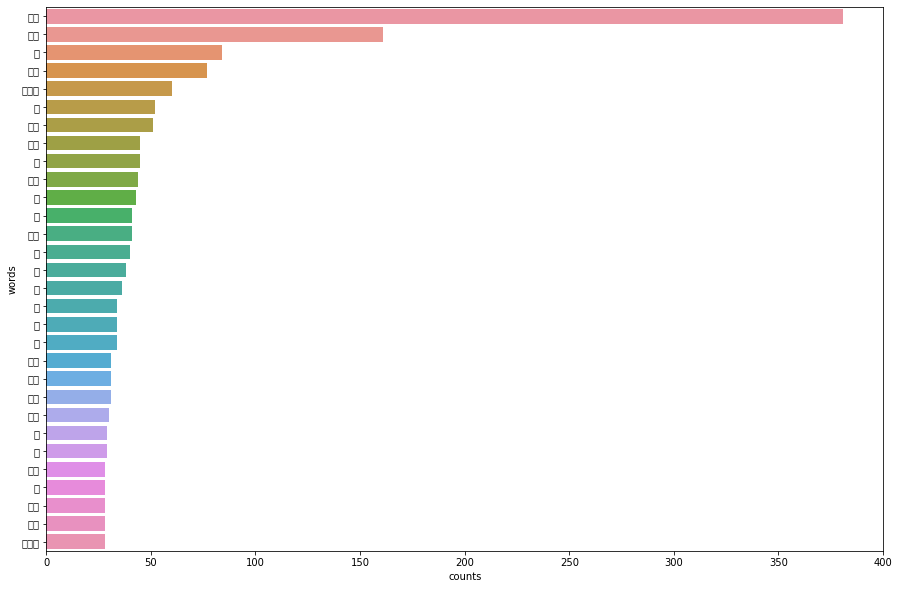

In [0]:
import seaborn as sns
one_body_count_df = pd.DataFrame(count.most_common(30))
one_body_count_df.columns = ['words', 'counts']
plt.figure(figsize=(15, 10))
sns.barplot(x = 'counts', y = 'words', data = one_body_count_df)

In [0]:
part_1

,date,title,body,month,day,clean_body
1655,02/18 22:18,인사캠 자유게시판,에 다 같이 모여서 뭐 하는 거 있을까요 ??\n엘씨끼리라던가,2,18,"[모, 뭐, 거, 엘, 끼리]"
1656,02/18 19:22,인사캠 자유게시판,그동안 뭔가 신나고 재밌는 일들만 소개해드린 것 같아 이번엔 그 반대편을 알려드리려...,2,18,"[그동안, 뭔가, 일, 소개, 것, 이번, 그, 반대편, 이제, 일몰, 생기, 기도..."
1659,02/18 16:58,인사캠 자유게시판,학교근처에 샤오롱바오 파는 곳 있나요??,2,18,"[학교, 근처, 샤오롱바오, 곳]"
1662,02/18 14:09,인사캠 자유게시판,"명륜이구요, 현재 3명 스터디중입니다!\n\n매번 풀어올 영역 정해서 풀고 온 뒤 ...",2,18,"[명륜, 이구, 현재, 명, 스터디, 매번, 영역, 정해, 풀, 온, 뒤, 형식, ..."
1663,02/18 11:28,인사캠 자유게시판,오프라인 개강하면 하는건가 이번에??,2,18,"[오프라인, 개강, 건가, 이번]"
...,...,...,...,...,...,...
2228,01/26 18:18,인사캠 자유게시판,우리학교 중국학생들 많은데 우한폐렴 안전하겠지...? 개강할때되면 안전하겠지...?,1,26,"[우리, 학교, 중국, 학생, 우한, 폐렴, 개강, 때]"
2235,01/26 00:22,인사캠 자유게시판,어린이 마스크 뭐 사는게 좋을까요? 어린 동생이 곧 있으면 개강하는데 마스크 사줘야...,1,26,"[어린이, 마스크, 뭐, 동생, 곧, 개강, 마스크, 것, 추천, 제일]"
2236,01/25 05:06,인사캠 자유게시판,뭘 해도 멘탈 회복이 아예 안됨 시발 거의 한달 가까이 밤에 잠도 안오고 밥도 안넘...,1,25,"[뭘, 해도, 멘탈, 회복, 아예, 시발, 거의, 달, 가까이, 밤, 잠도, 밥, ..."
2238,01/24 11:40,인사캠 자유게시판,개강하면 중국인밭일텐데 우리학교 단체로 우한폐렴행 아니냐,1,24,"[개강, 중국인, 밭, 우리, 학교, 단체, 우한, 폐렴, 행]"


In [0]:
from konlpy.tag import Mecab
from soynlp.normalizer import *

def my_pre(text):
  text = only_hangle_number(text)
  text = emoticon_normalize(text, num_repeats=2)
  return text

mecab = Mecab()
def my_tok(text):
  return [noun for noun in mecab.nouns(text)]

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

docs = part_1['body'].values
vectorizer = CountVectorizer(lowercase=False, preprocessor=my_pre, tokenizer=my_tok, max_features=1000)
X = vectorizer.fit_transform(docs)

In [0]:
from soyclustering import SphericalKMeans

spherical_kmeans = SphericalKMeans(n_clusters=40, verbose=1)

labels = spherical_kmeans.fit_predict(X)

initialization_time=0.023959 sec, sparsity=0.00455
n_iter=1, changed=448, inertia=295.502, iter_time=0.006 sec, sparsity=0.0702
n_iter=2, changed=78, inertia=219.553, iter_time=0.006 sec, sparsity=0.0701
n_iter=3, changed=19, inertia=213.890, iter_time=0.006 sec, sparsity=0.0704
n_iter=4, changed=6, inertia=213.247, iter_time=0.006 sec, sparsity=0.0704
n_iter=5, changed=6, inertia=212.928, iter_time=0.006 sec, sparsity=0.0705
n_iter=6, changed=4, inertia=212.743, iter_time=0.006 sec, sparsity=0.0705
n_iter=7, changed=0, inertia=212.743, iter_time=0.006 sec, sparsity=0.0705
Early converged.


In [0]:
import numpy as np

def labels_to_doc_topic_prob(labels):
    n_clusters = np.unique(labels).shape[0]
    n_docs = labels.shape[0]
    doc_topic_prob = np.zeros((n_docs, n_clusters))

    for c in range(n_clusters):
        idx = np.where(labels == c)[0]
        doc_topic_prob[idx, c] = 1

    return doc_topic_prob

In [0]:
def labels_x_to_topic_term_prob(labels, x):
    n_clusters = np.unique(labels).shape[0]
    n_terms = x.shape[1]

    topic_term_prob = np.zeros((n_clusters, n_terms))
    for c in range(n_clusters):
        idx = np.where(labels == c)[0]
        topic_term_freq = x[idx].sum(axis=0)
        freq_sum = topic_term_freq.sum()
        if freq_sum == 0:
            continue
        topic_term_prob[c] = topic_term_freq / freq_sum

    base = 1 / n_terms
    rowsum = topic_term_prob.sum(axis=1)
    topic_term_prob[np.where(rowsum == 0)[0]] = base

    return topic_term_prob

In [0]:
import pyLDAvis 

doc_topic_prob = labels_to_doc_topic_prob(labels)
topic_term_prob = labels_x_to_topic_term_prob(labels, X)
doc_lengths = np.asarray(X.sum(axis=1)).reshape(-1)
term_frequency = np.asarray(X.sum(axis=0)).reshape(-1)
idx_to_vocab = {v:k for k, v in vectorizer.vocabulary_.items()}

prepared_data = pyLDAvis.prepare(
    topic_term_prob,
    doc_topic_prob,
    doc_lengths,
    idx_to_vocab,
    term_frequency,
    mds = 'tsne',
    plot_opts = {'xlab': 't-SNE1', 'ylab': 't-SNE2'}
)

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


In [0]:
pyLDAvis.display(prepared_data) # part_1

In [0]:

docs = part2['body'].values
vectorizer = CountVectorizer(lowercase=False, preprocessor=my_pre, tokenizer=my_tok, max_features=1000)
X = vectorizer.fit_transform(docs)

spherical_kmeans = SphericalKMeans(n_clusters=40, verbose=1)

labels = spherical_kmeans.fit_predict(X)

import pyLDAvis 

doc_topic_prob = labels_to_doc_topic_prob(labels)
topic_term_prob = labels_x_to_topic_term_prob(labels, X)
doc_lengths = np.asarray(X.sum(axis=1)).reshape(-1)
term_frequency = np.asarray(X.sum(axis=0)).reshape(-1)
idx_to_vocab = {v:k for k, v in vectorizer.vocabulary_.items()}

prepared_data = pyLDAvis.prepare(
    topic_term_prob,
    doc_topic_prob,
    doc_lengths,
    idx_to_vocab,
    term_frequency,
    mds = 'tsne',
    plot_opts = {'xlab': 't-SNE1', 'ylab': 't-SNE2'}
)

initialization_time=0.014889 sec, sparsity=0.0102
n_iter=1, changed=660, inertia=407.403, iter_time=0.009 sec, sparsity=0.0958
n_iter=2, changed=114, inertia=346.516, iter_time=0.008 sec, sparsity=0.0987
n_iter=3, changed=44, inertia=336.771, iter_time=0.008 sec, sparsity=0.0992
n_iter=4, changed=41, inertia=333.436, iter_time=0.008 sec, sparsity=0.1
n_iter=5, changed=17, inertia=331.162, iter_time=0.008 sec, sparsity=0.1
n_iter=6, changed=13, inertia=330.536, iter_time=0.011 sec, sparsity=0.1
n_iter=7, changed=8, inertia=330.454, iter_time=0.010 sec, sparsity=0.1
n_iter=8, changed=7, inertia=330.404, iter_time=0.009 sec, sparsity=0.1
n_iter=9, changed=0, inertia=330.392, iter_time=0.009 sec, sparsity=0.1


/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


In [0]:
pyLDAvis.display(prepared_data) # part_2

In [0]:
docs = part3['body'].values
vectorizer = CountVectorizer(lowercase=False, preprocessor=my_pre, tokenizer=my_tok, max_features=1000)
X = vectorizer.fit_transform(docs)

spherical_kmeans = SphericalKMeans(n_clusters=80, verbose=1)

labels = spherical_kmeans.fit_predict(X)

import pyLDAvis 

doc_topic_prob = labels_to_doc_topic_prob(labels)
topic_term_prob = labels_x_to_topic_term_prob(labels, X)
doc_lengths = np.asarray(X.sum(axis=1)).reshape(-1)
term_frequency = np.asarray(X.sum(axis=0)).reshape(-1)
idx_to_vocab = {v:k for k, v in vectorizer.vocabulary_.items()}

prepared_data = pyLDAvis.prepare(
    topic_term_prob,
    doc_topic_prob,
    doc_lengths,
    idx_to_vocab,
    term_frequency,
    mds = 'tsne',
    plot_opts = {'xlab': 't-SNE1', 'ylab': 't-SNE2'}
)

initialization_time=0.019666 sec, sparsity=0.00701
n_iter=1, changed=303, inertia=128.288, iter_time=0.007 sec, sparsity=0.0367
n_iter=2, changed=32, inertia=100.162, iter_time=0.006 sec, sparsity=0.0369
n_iter=3, changed=17, inertia=97.803, iter_time=0.006 sec, sparsity=0.0369
n_iter=4, changed=8, inertia=96.848, iter_time=0.007 sec, sparsity=0.0369
n_iter=5, changed=5, inertia=96.391, iter_time=0.006 sec, sparsity=0.0369
n_iter=6, changed=3, inertia=96.165, iter_time=0.006 sec, sparsity=0.0369
n_iter=7, changed=0, inertia=96.165, iter_time=0.006 sec, sparsity=0.0369
Early converged.


/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


In [0]:
pyLDAvis.display(prepared_data) # part_3

In [0]:
docs = part4['body'].values
vectorizer = CountVectorizer(lowercase=False, preprocessor=my_pre, tokenizer=my_tok, max_features=1000)
X = vectorizer.fit_transform(docs)

spherical_kmeans = SphericalKMeans(n_clusters=40, verbose=1)

labels = spherical_kmeans.fit_predict(X)

import pyLDAvis 

doc_topic_prob = labels_to_doc_topic_prob(labels)
topic_term_prob = labels_x_to_topic_term_prob(labels, X)
doc_lengths = np.asarray(X.sum(axis=1)).reshape(-1)
term_frequency = np.asarray(X.sum(axis=0)).reshape(-1)
idx_to_vocab = {v:k for k, v in vectorizer.vocabulary_.items()}

prepared_data = pyLDAvis.prepare(
    topic_term_prob,
    doc_topic_prob,
    doc_lengths,
    idx_to_vocab,
    term_frequency,
    mds = 'tsne',
    plot_opts = {'xlab': 't-SNE1', 'ylab': 't-SNE2'}
)

initialization_time=0.022388 sec, sparsity=0.00688
n_iter=1, changed=132, inertia=63.930, iter_time=0.005 sec, sparsity=0.046
n_iter=2, changed=20, inertia=48.896, iter_time=0.004 sec, sparsity=0.0461
n_iter=3, changed=4, inertia=47.387, iter_time=0.004 sec, sparsity=0.0462
n_iter=4, changed=3, inertia=47.348, iter_time=0.004 sec, sparsity=0.0462
n_iter=5, changed=0, inertia=47.348, iter_time=0.004 sec, sparsity=0.0462
Early converged.


/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


In [0]:
pyLDAvis.display(prepared_data) # part_4

In [0]:
docs = part5['body'].values
vectorizer = CountVectorizer(lowercase=False, preprocessor=my_pre, tokenizer=my_tok, max_features=1000)
X = vectorizer.fit_transform(docs)

spherical_kmeans = SphericalKMeans(n_clusters=20, verbose=1)
# 여기 60으로 함
labels = spherical_kmeans.fit_predict(X)

import pyLDAvis 

doc_topic_prob = labels_to_doc_topic_prob(labels)
topic_term_prob = labels_x_to_topic_term_prob(labels, X)
doc_lengths = np.asarray(X.sum(axis=1)).reshape(-1)
term_frequency = np.asarray(X.sum(axis=0)).reshape(-1)
idx_to_vocab = {v:k for k, v in vectorizer.vocabulary_.items()}

prepared_data = pyLDAvis.prepare(
    topic_term_prob,
    doc_topic_prob,
    doc_lengths,
    idx_to_vocab,
    term_frequency,
    mds = 'tsne',
    plot_opts = {'xlab': 't-SNE1', 'ylab': 't-SNE2'}
)

initialization_time=0.005827 sec, sparsity=0.016
n_iter=1, changed=59, inertia=26.523, iter_time=0.002 sec, sparsity=0.0737
n_iter=2, changed=5, inertia=18.987, iter_time=0.002 sec, sparsity=0.0746
n_iter=3, changed=0, inertia=18.531, iter_time=0.002 sec, sparsity=0.0746
Early converged.


/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


In [0]:
pyLDAvis.display(prepared_data) # part_5

In [0]:
docs = only_3_df['body'].values
vectorizer = CountVectorizer(lowercase=False, preprocessor=my_pre, tokenizer=my_tok, max_features=1000)
X = vectorizer.fit_transform(docs)

spherical_kmeans = SphericalKMeans(n_clusters=60, verbose=1)
labels = spherical_kmeans.fit_predict(X)

import pyLDAvis 

doc_topic_prob = labels_to_doc_topic_prob(labels)
topic_term_prob = labels_x_to_topic_term_prob(labels, X)
doc_lengths = np.asarray(X.sum(axis=1)).reshape(-1)
term_frequency = np.asarray(X.sum(axis=0)).reshape(-1)
idx_to_vocab = {v:k for k, v in vectorizer.vocabulary_.items()}

prepared_data = pyLDAvis.prepare(
    topic_term_prob,
    doc_topic_prob,
    doc_lengths,
    idx_to_vocab,
    term_frequency,
    mds = 'tsne',
    plot_opts = {'xlab': 't-SNE1', 'ylab': 't-SNE2'}
)

initialization_time=0.020870 sec, sparsity=0.0266
n_iter=1, changed=1579, inertia=1026.917, iter_time=0.020 sec, sparsity=0.133
n_iter=2, changed=433, inertia=813.492, iter_time=0.018 sec, sparsity=0.135
n_iter=3, changed=183, inertia=784.583, iter_time=0.018 sec, sparsity=0.136
n_iter=4, changed=112, inertia=773.830, iter_time=0.018 sec, sparsity=0.136
n_iter=5, changed=69, inertia=768.361, iter_time=0.017 sec, sparsity=0.136
n_iter=6, changed=41, inertia=764.597, iter_time=0.024 sec, sparsity=0.137
n_iter=7, changed=28, inertia=763.507, iter_time=0.018 sec, sparsity=0.137
n_iter=8, changed=18, inertia=762.863, iter_time=0.018 sec, sparsity=0.137
n_iter=9, changed=16, inertia=762.427, iter_time=0.017 sec, sparsity=0.137
n_iter=10, changed=14, inertia=762.111, iter_time=0.018 sec, sparsity=0.137


/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


In [0]:
pyLDAvis.display(prepared_data) # overall

In [0]:
from soykeyword.proportion import CorpusbasedKeywordExtractor

corpusbased_extractor = CorpusbasedKeywordExtractor(
    min_tf=20,
    min_df=2,
    tokenize=my_tok,
    verbose=True
)

corpusbased_extractor.train(docs)

training was done 1816 terms, 1720 docs, memory = 0.673 Gb


In [0]:
keywords = corpusbased_extractor.extract_from_word(
    '온라인',
    min_frequency=10,
    min_score=0.5
)

keywords[:20]

[KeywordScore(word='온라인', frequency=104, score=1.0),
 KeywordScore(word='미션', frequency=13, score=1.0),
 KeywordScore(word='회원', frequency=12, score=1.0),
 KeywordScore(word='이루리', frequency=17, score=0.9890105641096458),
 KeywordScore(word='현장', frequency=14, score=0.9865087545603732),
 KeywordScore(word='교보문고', frequency=13, score=0.9854008974467163),
 KeywordScore(word='할인', frequency=23, score=0.9740249849311402),
 KeywordScore(word='대체', frequency=18, score=0.9656639398018708),
 KeywordScore(word='학년도', frequency=17, score=0.9633013702420443),
 KeywordScore(word='방안', frequency=10, score=0.9574452156615295),
 KeywordScore(word='총학생회', frequency=24, score=0.9553055933718835),
 KeywordScore(word='운영', frequency=19, score=0.9402963127458895),
 KeywordScore(word='배송', frequency=17, score=0.9310319724613214),
 KeywordScore(word='적용', frequency=13, score=0.9267708021808646),
 KeywordScore(word='확산', frequency=13, score=0.9267708021808646),
 KeywordScore(word='실습', frequency=16, score=0.

In [0]:
keywords = corpusbased_extractor.extract_from_word(
    '오프라인',
    min_frequency=10,
    min_score=0.5
)

keywords[:20]

[KeywordScore(word='오프라인', frequency=178, score=1.0),
 KeywordScore(word='방안', frequency=10, score=0.9765765765765767),
 KeywordScore(word='에코', frequency=22, score=0.954225352112676),
 KeywordScore(word='어스', frequency=10, score=0.9487964989059081),
 KeywordScore(word='토론', frequency=12, score=0.9328743545611016),
 KeywordScore(word='실습', frequency=16, score=0.9328743545611015),
 KeywordScore(word='실기', frequency=10, score=0.915319662243667),
 KeywordScore(word='미션', frequency=13, score=0.9124579124579124),
 KeywordScore(word='금지', frequency=12, score=0.9025811823480433),
 KeywordScore(word='실험', frequency=24, score=0.9025811823480433),
 KeywordScore(word='학년도', frequency=17, score=0.8946578631452581),
 KeywordScore(word='운영', frequency=19, score=0.8881605899221631),
 KeywordScore(word='총학생회', frequency=24, score=0.8853315909833388),
 KeywordScore(word='해결', frequency=13, score=0.8811217232269865),
 KeywordScore(word='누나', frequency=10, score=0.8741935483870968),
 KeywordScore(word='시

In [0]:
keywords = corpusbased_extractor.extract_from_word(
    '신천지',
    min_frequency=10,
    min_score=0.5
)

keywords[:20]

[KeywordScore(word='신천지', frequency=19, score=1.0),
 KeywordScore(word='지인', frequency=12, score=0.9835558109767247),
 KeywordScore(word='설문', frequency=14, score=0.9637457885794914),
 KeywordScore(word='조사', frequency=16, score=0.962453455577236),
 KeywordScore(word='익명', frequency=13, score=0.9587801005123839),
 KeywordScore(word='알바', frequency=10, score=0.9522382397572079),
 KeywordScore(word='소모임', frequency=14, score=0.9373156250388976),
 KeywordScore(word='길', frequency=12, score=0.9343870516237586),
 KeywordScore(word='이름', frequency=12, score=0.9343870516237586),
 KeywordScore(word='이건', frequency=11, score=0.9193074338244046),
 KeywordScore(word='공식', frequency=20, score=0.9147880504388933),
 KeywordScore(word='등등', frequency=12, score=0.908830877294616),
 KeywordScore(word='모임', frequency=19, score=0.9019781641343212),
 KeywordScore(word='마지막', frequency=13, score=0.8985904148207814),
 KeywordScore(word='검사', frequency=10, score=0.8952280184507109),
 KeywordScore(word='사과', 

In [0]:
keywords = corpusbased_extractor.extract_from_word(
    '과외',
    min_frequency=10,
    min_score=0.5
)

keywords[:20]

[KeywordScore(word='과외', frequency=24, score=1.0),
 KeywordScore(word='시국', frequency=10, score=0.9597850259451446),
 KeywordScore(word='대구', frequency=22, score=0.9543025612677354),
 KeywordScore(word='회', frequency=15, score=0.952941717650306),
 KeywordScore(word='엄마', frequency=23, score=0.9392796256665095),
 KeywordScore(word='만', frequency=35, score=0.932985047739146),
 KeywordScore(word='지하철', frequency=10, score=0.932985047739146),
 KeywordScore(word='너', frequency=16, score=0.9278036546040845),
 KeywordScore(word='상태', frequency=27, score=0.9267742743638381),
 KeywordScore(word='처음', frequency=17, score=0.922679494031712),
 KeywordScore(word='수능', frequency=13, score=0.9101133468060802),
 KeywordScore(word='제', frequency=53, score=0.9082578863143126),
 KeywordScore(word='장소', frequency=20, score=0.9076410795653698),
 KeywordScore(word='돈', frequency=35, score=0.9027366219278369),
 KeywordScore(word='이유', frequency=28, score=0.9027366219278369),
 KeywordScore(word='위험', frequenc

In [0]:
keywords = corpusbased_extractor.extract_from_word(
    '성적',
    min_frequency=10,
    min_score=0.5
)

keywords[:20]

[KeywordScore(word='수학', frequency=14, score=0.9862486062776632),
 KeywordScore(word='기말고사', frequency=11, score=0.9695822226651054),
 KeywordScore(word='방안', frequency=10, score=0.9653872321124845),
 KeywordScore(word='점수', frequency=13, score=0.9641512342280846),
 KeywordScore(word='총학생회', frequency=24, score=0.9522038675330775),
 KeywordScore(word='음악', frequency=13, score=0.950311317299475),
 KeywordScore(word='누나', frequency=10, score=0.9471737296385229),
 KeywordScore(word='시발', frequency=10, score=0.9471737296385229),
 KeywordScore(word='실기', frequency=10, score=0.9471737296385229),
 KeywordScore(word='이루리', frequency=17, score=0.9446785374473291),
 KeywordScore(word='실습', frequency=16, score=0.9389072350645452),
 KeywordScore(word='영어', frequency=25, score=0.9383222891151308),
 KeywordScore(word='과학', frequency=20, score=0.9359368988072335),
 KeywordScore(word='실험', frequency=24, score=0.9338914975931013),
 KeywordScore(word='살', frequency=25, score=0.9283124660570389),
 Keywor

In [0]:
keywords = corpusbased_extractor.extract_from_word(
    '외국',
    min_frequency=10,
    min_score=0.5
)

keywords[:20]

[KeywordScore(word='기말고사', frequency=11, score=0.975427887030097),
 KeywordScore(word='음악', frequency=13, score=0.9731860210753538),
 KeywordScore(word='점수', frequency=13, score=0.9731860210753538),
 KeywordScore(word='영어', frequency=25, score=0.9608978619128897),
 KeywordScore(word='비율', frequency=10, score=0.9577769347496206),
 KeywordScore(word='수학', frequency=14, score=0.9444839325128128),
 KeywordScore(word='중요', frequency=19, score=0.9428482067416989),
 KeywordScore(word='경우', frequency=72, score=0.9315548667994982),
 KeywordScore(word='플', frequency=33, score=0.9189749936301096),
 KeywordScore(word='노력', frequency=18, score=0.9189749936301095),
 KeywordScore(word='편', frequency=16, score=0.9115888444373835),
 KeywordScore(word='추천', frequency=23, score=0.9084595732431362),
 KeywordScore(word='시험', frequency=94, score=0.905868211908649),
 KeywordScore(word='이해', frequency=21, score=0.9007295884692913),
 KeywordScore(word='팀', frequency=46, score=0.8993560585301693),
 KeywordScore

In [0]:
keywords = corpusbased_extractor.extract_from_word(
    '과제',
    min_frequency=10,
    min_score=0.5
)

keywords[:20]

[KeywordScore(word='과제', frequency=61, score=1.0),
 KeywordScore(word='기말고사', frequency=11, score=0.9610386500040714),
 KeywordScore(word='점수', frequency=13, score=0.9481097771029766),
 KeywordScore(word='실습', frequency=16, score=0.9426747103430779),
 KeywordScore(word='조사', frequency=16, score=0.9426747103430779),
 KeywordScore(word='지인', frequency=12, score=0.9426747103430778),
 KeywordScore(word='신천지', frequency=19, score=0.9388305152555221),
 KeywordScore(word='설문', frequency=14, score=0.9319893979046648),
 KeywordScore(word='방안', frequency=10, score=0.9274837743384923),
 KeywordScore(word='토론', frequency=12, score=0.9164080323926583),
 KeywordScore(word='실험', frequency=24, score=0.9164080323926583),
 KeywordScore(word='총학생회', frequency=24, score=0.9013390907767697),
 KeywordScore(word='음악', frequency=13, score=0.8976489714564699),
 KeywordScore(word='의견', frequency=15, score=0.891565461986589),
 KeywordScore(word='영어', frequency=25, score=0.891565461986589),
 KeywordScore(word='비율

In [0]:
keywords = corpusbased_extractor.extract_from_word(
    '통아',
    min_frequency=10,
    min_score=0.5
)

keywords[:20]

[KeywordScore(word='통아', frequency=64, score=1.0),
 KeywordScore(word='우울', frequency=11, score=0.9423796570432379),
 KeywordScore(word='사회', frequency=15, score=0.9075186337651061),
 KeywordScore(word='토론', frequency=12, score=0.907518633765106),
 KeywordScore(word='거리', frequency=12, score=0.907518633765106),
 KeywordScore(word='현실', frequency=13, score=0.8971474559599392),
 KeywordScore(word='시국', frequency=10, score=0.8937428734321551),
 KeywordScore(word='오피셜', frequency=10, score=0.8937428734321551),
 KeywordScore(word='캠', frequency=249, score=0.88472573975738),
 KeywordScore(word='한국', frequency=15, score=0.8771003444477471),
 KeywordScore(word='자취방', frequency=15, score=0.8771003444477471),
 KeywordScore(word='개학', frequency=19, score=0.8751447990956163),
 KeywordScore(word='지방', frequency=35, score=0.8532671094819742),
 KeywordScore(word='전화', frequency=14, score=0.8425826390755173),
 KeywordScore(word='바이러스', frequency=15, score=0.8306948400344439),
 KeywordScore(word='모두', 